# 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# 2. Loading dataset

In [2]:
train = pd.read_csv('train_ctrUa4K.csv')

In [3]:
test = pd.read_csv('test_lAUu6dG.csv')

# 3. EDA

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

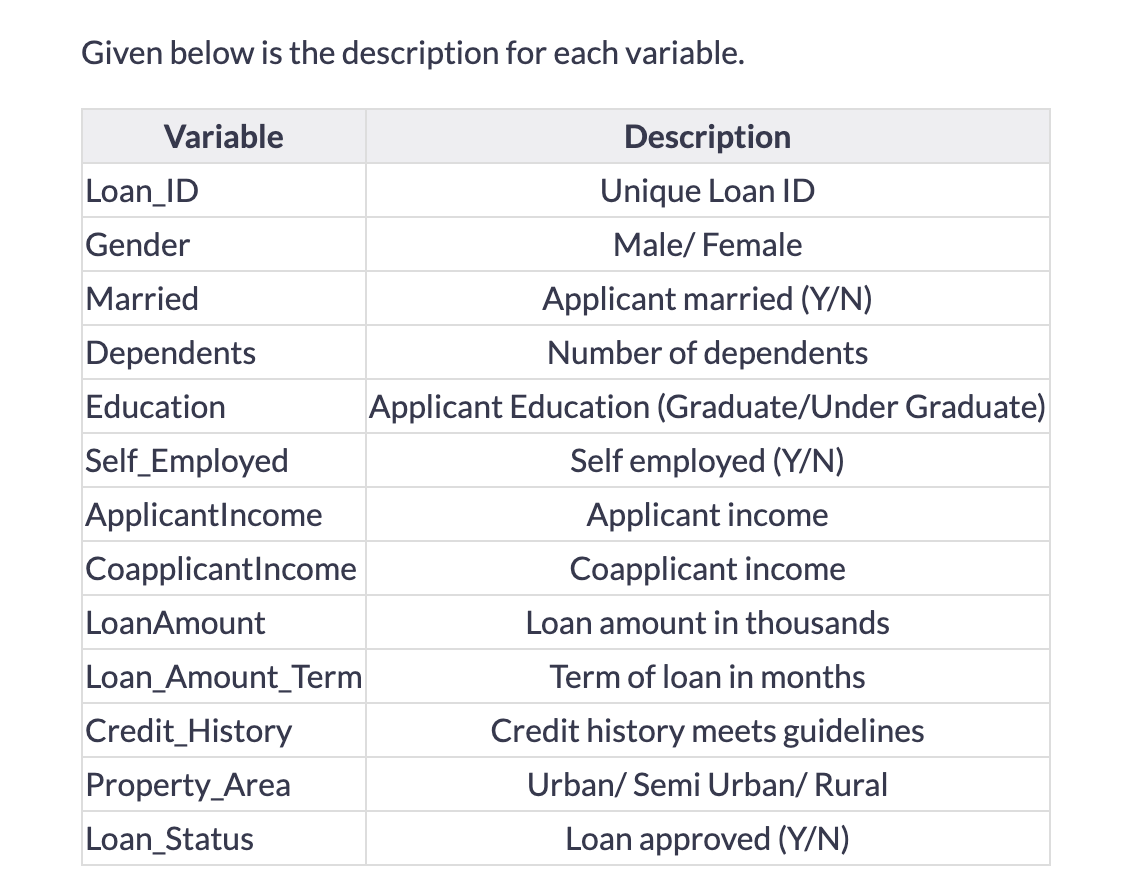

In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
train.shape

(614, 13)

In [8]:
test.shape

(367, 12)

In [9]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Loan Status is our target variable

In [10]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

## We will try to fill the missing values

<Axes: xlabel='Gender', ylabel='count'>

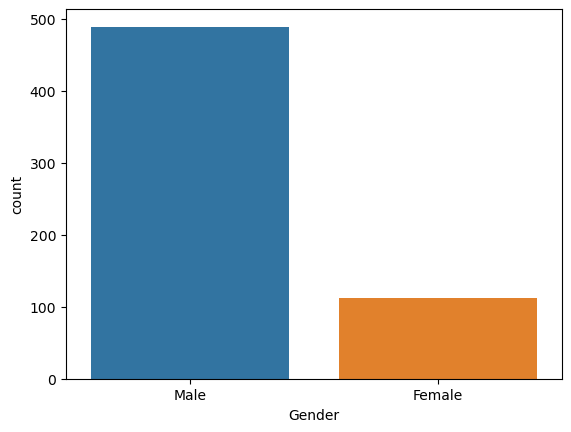

In [12]:
sns.countplot(data = train, x = 'Gender')

## Here most of the loan applicant are male so we will impute the missing value in Gender column with male as a replacement for missing values

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [14]:
from sklearn.pipeline import Pipeline

In [15]:
pipe = Pipeline([
    ('imputer', imputer)]
)

In [16]:
gender = imputer.fit_transform(train[['Gender']])

In [17]:
df = pd.DataFrame(gender)

In [18]:
df.isnull().sum()

0    0
dtype: int64

In [19]:
train['Gender'] = df

In [20]:
train['Gender'].isnull().sum()

0

In [21]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Now lets see the Married column

<Axes: xlabel='Married', ylabel='count'>

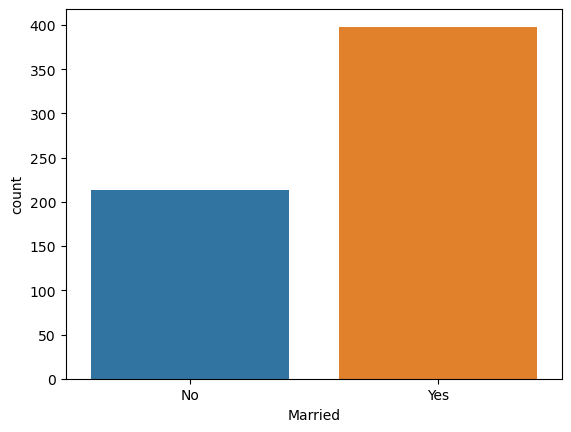

In [22]:
sns.countplot(data = train, x = 'Married')

In [23]:
married = imputer.fit_transform(train[['Married']])

In [24]:
df_married = pd.DataFrame(married)

In [25]:
train['Married'] = df_married

## Now let's check Dependents column

<Axes: xlabel='Dependents', ylabel='count'>

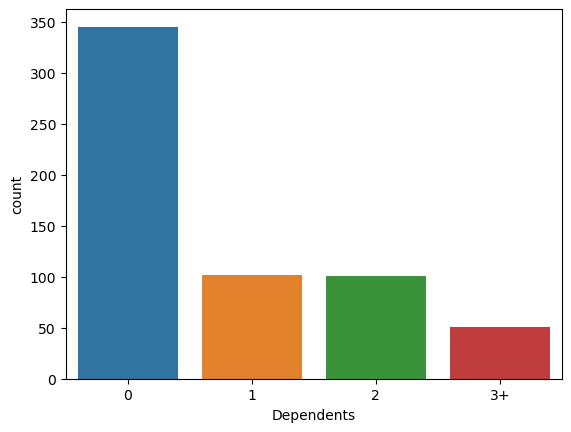

In [26]:
sns.countplot(data = train, x = 'Dependents')

In [27]:
dependents = imputer.fit_transform(train[['Dependents']])

In [28]:
df_dependents = pd.DataFrame(dependents)

In [29]:
train['Dependents'] = df_dependents

## Now let's check self employed

<Axes: xlabel='Self_Employed', ylabel='count'>

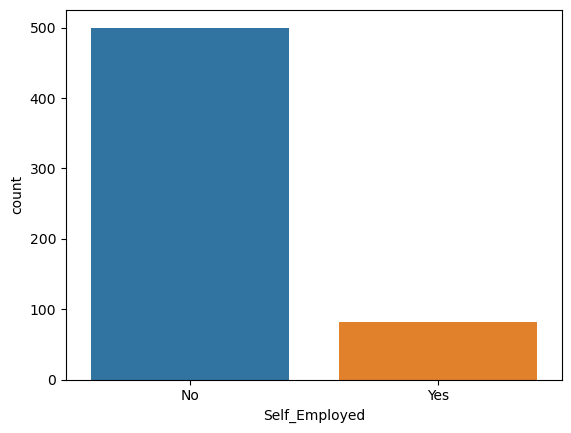

In [30]:
sns.countplot(data = train, x = 'Self_Employed')

In [31]:
employed = imputer.fit_transform(train[['Self_Employed']])

In [32]:
df_employed = pd.DataFrame(employed)

In [33]:
train['Self_Employed'] = df_employed

## Now let's check Loan Amount

<Axes: xlabel='LoanAmount', ylabel='Count'>

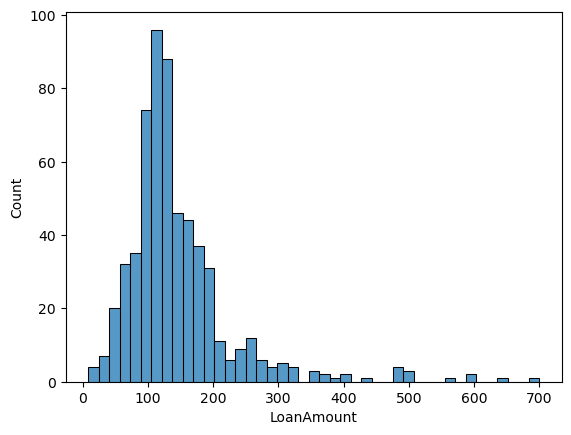

In [34]:
sns.histplot(data = train, x = 'LoanAmount')

## We will fill the missing values with the mean of the loan amount

In [35]:
train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace = True)

In [36]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

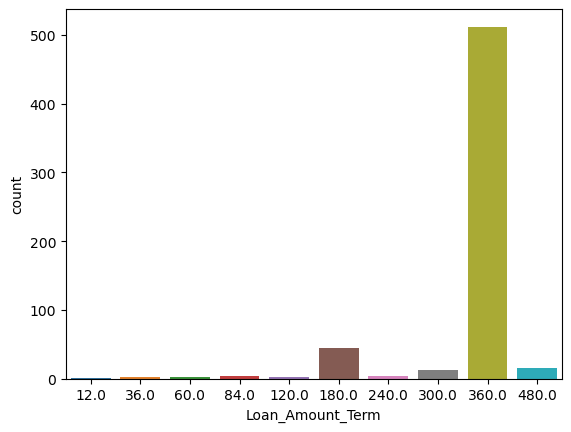

In [37]:
sns.countplot(data = train, x = 'Loan_Amount_Term')

In [38]:
loan_amount_term = imputer.fit_transform(train[['Loan_Amount_Term']])

In [39]:
df_loan_term = pd.DataFrame(loan_amount_term)

In [40]:
train['Loan_Amount_Term'] = df_loan_term

<Axes: xlabel='Credit_History', ylabel='count'>

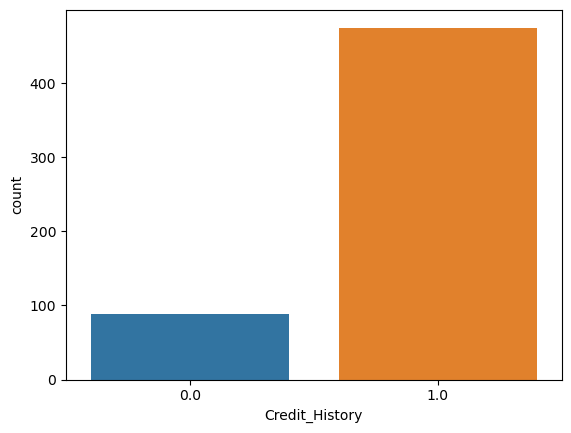

In [41]:
sns.countplot(data = train, x = 'Credit_History')

In [42]:
credit_history = imputer.fit_transform(train[['Credit_History']])

In [43]:
df_credit_history = pd.DataFrame(credit_history)

In [44]:
train['Credit_History'] = df_credit_history

In [45]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Now our dataset is clean

In [46]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


## Extracting features and target variables

In [47]:
X = train.iloc[:,:-1]
y = train.iloc[:,-1]

In [48]:
X.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban


In [49]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

## Now loan id is not an important variable at all for our analysis hence we will drop it.

In [50]:
X.drop(columns='Loan_ID', inplace = True)

In [51]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban


## Now we will split the dataset into training and testing

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [54]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
553,Male,Yes,0,Not Graduate,No,2454,2333.0,181.0,360.0,0.0,Urban
601,Male,Yes,0,Not Graduate,No,2894,2792.0,155.0,360.0,1.0,Rural
261,Male,No,0,Graduate,No,2060,2209.0,134.0,360.0,1.0,Semiurban
496,Male,Yes,0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural
529,Male,No,0,Not Graduate,No,6783,0.0,130.0,360.0,1.0,Semiurban


In [55]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
350,Male,Yes,0,Graduate,No,9083,0.0,228.0,360.0,1.0,Semiurban
377,Male,Yes,0,Graduate,No,4310,0.0,130.0,360.0,1.0,Semiurban
163,Male,Yes,2,Graduate,No,4167,1447.0,158.0,360.0,1.0,Rural
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
132,Male,No,0,Graduate,No,2718,0.0,70.0,360.0,1.0,Semiurban


## Now we will encode the categorical values into numerical values 

## Although Education is Ordinal category but for simplicity we will use ohe

In [56]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first', dtype = np.int32)
le = LabelEncoder()

In [57]:
X_train_new = ohe.fit_transform(X_train[['Gender', 'Married', 'Self_Employed', 'Property_Area', 'Education']])

In [58]:
X_test_new = ohe.transform(X_test[['Gender', 'Married', 'Self_Employed', 'Property_Area', 'Education']])

In [59]:
col = ohe.get_feature_names_out()

In [60]:
col

array(['Gender_Male', 'Married_Yes', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban',
       'Education_Not Graduate'], dtype=object)

In [61]:
X_train_encoded = pd.DataFrame(X_test_new, columns=col)

In [62]:
X_train_encoded

,Gender_Male,Married_Yes,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Education_Not Graduate
0,1,1,0,1,0,0
1,1,1,0,1,0,0
2,1,1,0,0,0,0
3,0,0,0,0,0,0
4,1,0,0,1,0,0
...,...,...,...,...,...,...
180,1,1,0,1,0,0
181,1,1,0,0,0,1
182,1,1,0,0,1,0
183,1,1,0,0,0,0


In [63]:
X_test_encoded = pd.DataFrame(X_test_new, columns=col)

In [64]:
X_test_encoded

,Gender_Male,Married_Yes,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Education_Not Graduate
0,1,1,0,1,0,0
1,1,1,0,1,0,0
2,1,1,0,0,0,0
3,0,0,0,0,0,0
4,1,0,0,1,0,0
...,...,...,...,...,...,...
180,1,1,0,1,0,0
181,1,1,0,0,0,1
182,1,1,0,0,1,0
183,1,1,0,0,0,0


In [65]:
X_train_encoded.isnull().sum()

Gender_Male                0
Married_Yes                0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Education_Not Graduate     0
dtype: int64

In [66]:
X_test_encoded.isnull().sum()

Gender_Male                0
Married_Yes                0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Education_Not Graduate     0
dtype: int64

In [67]:
X_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [68]:
X_test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [69]:
X_train.drop(columns=['Gender', 'Married', 'Self_Employed', 'Property_Area', 'Education'], inplace = True)

In [70]:
X_train

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
553,0,2454,2333.0,181.000000,360.0,0.0
601,0,2894,2792.0,155.000000,360.0,1.0
261,0,2060,2209.0,134.000000,360.0,1.0
496,0,2600,1700.0,107.000000,360.0,1.0
529,0,6783,0.0,130.000000,360.0,1.0
...,...,...,...,...,...,...
71,2,1875,1875.0,97.000000,360.0,1.0
106,2,11417,1126.0,225.000000,360.0,1.0
270,0,3237,0.0,30.000000,360.0,1.0
435,0,10047,0.0,146.412162,240.0,1.0


In [71]:
X_test.drop(columns=['Gender', 'Married', 'Self_Employed', 'Property_Area', 'Education'], inplace = True)

In [72]:
X_test

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
350,0,9083,0.0,228.0,360.0,1.0
377,0,4310,0.0,130.0,360.0,1.0
163,2,4167,1447.0,158.0,360.0,1.0
609,0,2900,0.0,71.0,360.0,1.0
132,0,2718,0.0,70.0,360.0,1.0
...,...,...,...,...,...,...
380,0,3333,2500.0,128.0,360.0,1.0
446,2,4652,0.0,110.0,360.0,1.0
144,2,11757,0.0,187.0,180.0,1.0
290,0,3075,2416.0,139.0,360.0,1.0


In [73]:
X_test.isnull().sum()

Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [74]:
X_train.shape

(429, 6)

In [75]:
X_train_encoded.shape

(185, 6)

In [76]:
X_test.shape

(185, 6)

In [77]:
X_test_encoded.shape

(185, 6)

## Since having trouble I will export these files as csv and will combine them using excel then again import the final file

In [78]:
X_train.to_csv('X_train.csv', index=False)

In [79]:
X_train_encoded.to_csv('X_train_encoded.csv', index=False)

In [80]:
X_test.to_csv('X_test.csv', index=False)

In [81]:
X_test_encoded.to_csv('X_test_encoded.csv', index=False)

In [82]:
X_train = pd.read_csv('X_train.csv')

In [83]:
X_test = pd.read_csv('X_test.csv')

In [84]:
X_train.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Education_Not Graduate
0,0,2454,2333.0,181.0,360,0,1.0,1.0,0.0,1.0,0.0,0.0
1,0,2894,2792.0,155.0,360,1,1.0,1.0,0.0,1.0,0.0,0.0
2,0,2060,2209.0,134.0,360,1,1.0,1.0,0.0,0.0,0.0,0.0
3,0,2600,1700.0,107.0,360,1,0.0,0.0,0.0,0.0,0.0,0.0
4,0,6783,0.0,130.0,360,1,1.0,0.0,0.0,1.0,0.0,0.0


In [89]:
X_train['Dependents'].replace({'3+':3}, inplace = True)

In [90]:
X_test['Dependents'].replace({'3+':3}, inplace = True)

## Applying different model 

In [91]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [92]:
lr.fit(X_train, y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values